In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings
import seaborn as sns

from random import *

warnings.filterwarnings('ignore')
%matplotlib inline

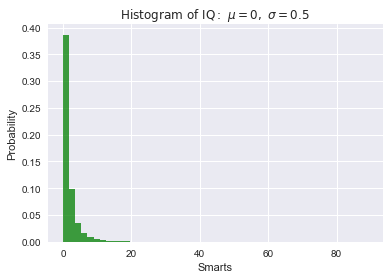

In [2]:
## get syncronize dataset
#generate N=10000 [chl]
chl_ori, sigma = 0, 0.5
chl_ori = chl_ori + sigma*np.random.randn(10000)
chl_ori = 10**(chl_ori)

#chl_ori = chl_ori[chl_ori<10]
# the histogram of the data
n, bins, patches = plt.hist(chl_ori, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=0,\ \sigma=0.5$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


In [3]:
#generate pigments according to [chl] and taxonomy
# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = chl_ori
x = np.log10(y)
micro = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
diatom = 1./ (1.3272 + np.exp (-3.9828* x + 0.1953)) #Diatom
dino = micro - diatom #Dino

pico = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
prokaryotes = (0.0067/0.6154/y)*np.exp(-19.5190*((x + 0.9643)**2)/(0.0067**2)) + 0.1027*(x**2) \
    -0.1189*x +0.0626
picoeukaryotes = pico - prokaryotes

nano = 1 - micro - pico
greenalgae = (0.2490/y) * np.exp(-1.2621*(x-0.5523)**2)
prymnesiophytes = nano - greenalgae

#########################################################################
fuco = diatom * y / 1.4
perid = dino * y / 1.4
zea = prokaryotes * y / 0.86
chlb = greenalgae * y / 1.01
hexa = (picoeukaryotes * y ) / 0.635
but = (prymnesiophytes *y - 0.635*hexa)/0.35
allo = (y - 1.41 * fuco-1.41* perid-1.27* hexa-0.35* but-1.01 *chlb -0.86 *zea)/0.6

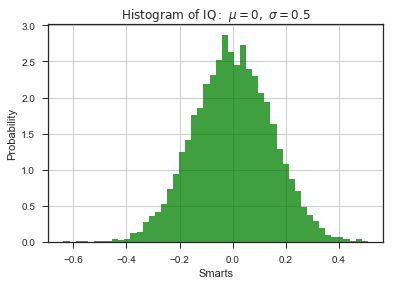

In [47]:
#add noise noise% to pigments
noise, sigma = 0, 0.15
noise = noise + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(noise, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=0,\ \sigma=0.5$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [48]:
fuco = fuco +  fuco*noise
perid = perid +  perid* noise
zea = zea + zea* noise
chlb = chlb+ chlb* noise
hexa = hexa +hexa* noise
but =  but + but*noise
allo = allo + allo* noise

#calculate uncertainty of new taxonomy with noises
chl = 1.41 * fuco+1.41* perid+1.27* hexa+0.35* but+1.01 *chlb +0.86 *zea+0.6*allo
diatom_noise = 1.41 * fuco/chl
dino_noise = 1.41 * perid/chl
micro_noise = diatom_noise + dino_noise

prokaryotes_noise = 0.86 * zea/chl
picoeukaryotes_noise =  0.5* 1.27*hexa/chl
pico_noise = prokaryotes_noise+picoeukaryotes_noise 

greenalgae_noise = 1.01*chlb/chl
prymnesiophytes_noise =  0.5* 1.27*hexa/chl+0.35*but/chl
nano_noise = 1-micro_noise-pico_noise

In [49]:
#create chl uncertainty 
chl = chl + chl*noise

In [50]:
y = chl
x = np.log10(y)

micro_noise = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
diatom_noise = 1./ (1.3272 + np.exp (-3.9828* x + 0.1953)) #Diatom
dino_noise = micro_noise - diatom_noise #Dino

pico_noise = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
prokaryotes_noise = (0.0067/0.6154/y)*np.exp(-19.5190*((x + 0.9643)**2)/(0.0067**2)) + 0.1027*(x**2) \
    -0.1189*x +0.0626
picoeukaryotes_noise = pico_noise - prokaryotes_noise

nano_noise = 1 - micro_noise - pico_noise
greenalgae_noise = (0.2490/y) * np.exp(-1.2621*(x-0.5523)**2)
prymnesiophytes_noise = nano_noise - greenalgae_noise

In [51]:
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 10))

sp = {
    'micro': [micro, micro_noise],
    'diatom':[diatom,diatom_noise],
    'dino':[dino,dino_noise],
    'pico':[pico,pico_noise],
    'prokaryotes':[prokaryotes,prokaryotes_noise],
    'picoeukaryotes':[picoeukaryotes,picoeukaryotes_noise],
    'nano':[nano,nano_noise],
    'greenalgae':[greenalgae,greenalgae_noise],
    'prymnesiophytes':[prymnesiophytes,prymnesiophytes_noise]}

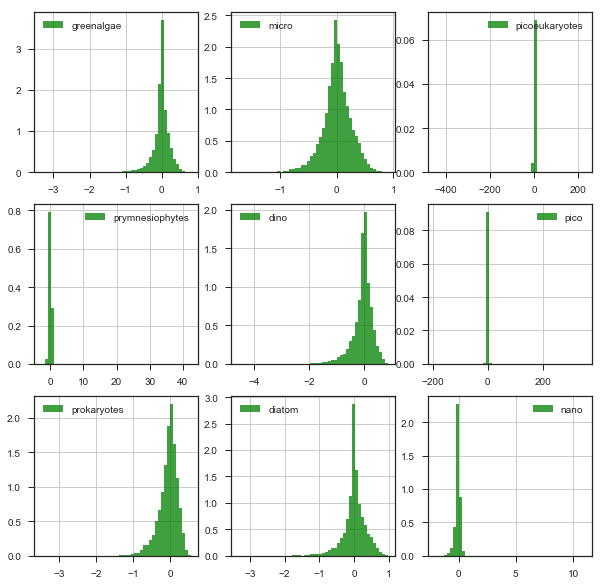

In [52]:
n = np.arange(9)+1
fig = plt.figure(figsize=(10, 10))
for i, si in zip(n, sp):
    plt.subplot(3,3,i)
    var, var_noise = sp[si]
    diff= (var - var_noise)/var
    n, bins, patches = plt.hist(diff, 50, normed=1, facecolor='green', alpha=0.75, label=si)

    # add a 'best fit' line
    #y = mlab.normpdf( bins, mu, sigma)
    #l = plt.plot(bins, y, 'r--', linewidth=1)

    #plt.xlabel('Smarts')
    #plt.ylabel('Probability')
    #plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=0,\ \sigma=0.5$')
    #plt.xlim([-5, 5])
    plt.grid(True)
    plt.legend()

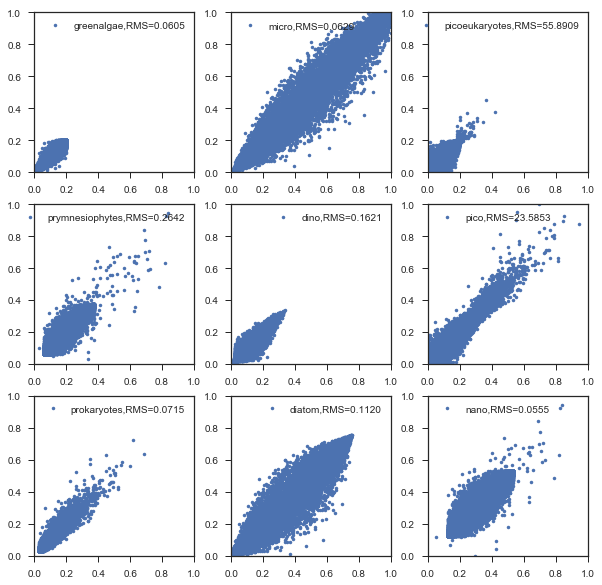

In [53]:
n = np.arange(9)+1
fig = plt.figure(figsize=(10, 10))
for i, si in zip(n, sp):
    plt.subplot(3,3,i)
    var, var_noise = sp[si]
    diff = (var - var_noise)/var
    plt.plot(var,var_noise, '.',
             label='%s,RMS=%.4f' % (si,np.nanmean(diff*diff)))
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')

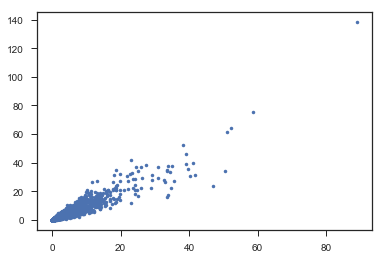

In [54]:
plt.plot(chl_ori,chl,'.')